# EDA To Prediction(DieTanic)
https://www.kaggle.com/ash316/eda-to-prediction-dietanic/notebook

## Part1: Exploratory Data Analysis(EDA)

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [75]:
data = pd.read_csv('../input/train.csv')

In [76]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many Survived?

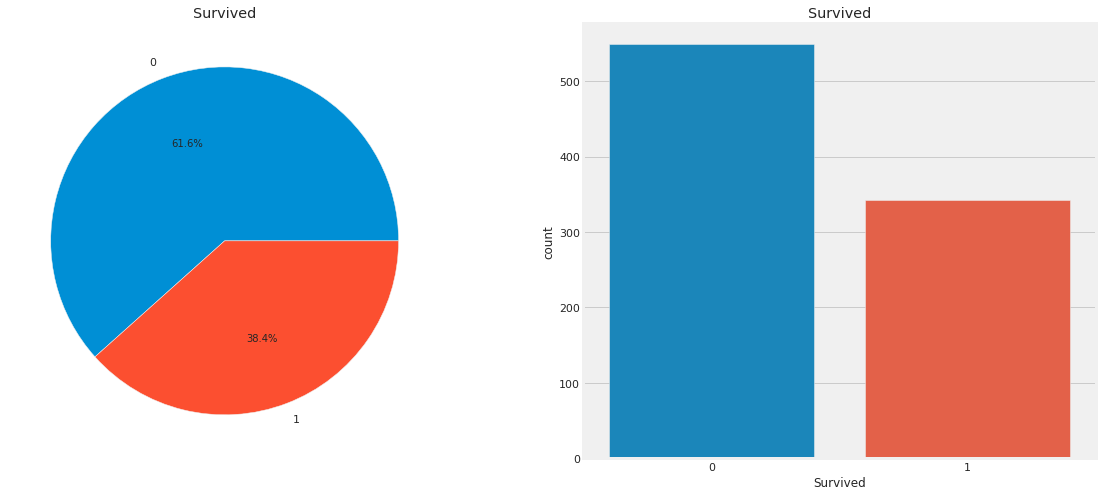

In [78]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

위의 차트를 통해 생존자가 많지 않음을 알수 있다.
891의 트레이닝 데이터의 승객중 대략 350명(38.4%)많이 생존했다. 
데이터를 좀더 깊이 파고 들어가서 생존과 사망을 나눈 카테고리가 무었인지 확인해볼것이다.

데이터셋의 다른 피쳐를 사용하여 생존율을 확인할것이다. 피쳐에는 성별, 출발항, 나이등이 있다.
각각의 피쳐가 어떤 차이가 있는지 먼저 알아보자

In [79]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Types of Features

### Categorical Features

범주형 변수는 두 개 이상의 범주가있는 변수이며 해당 기능의 각 값을 범주별로 분류 할 수 있습니다. 예를 들어 성별은 두 가지 범주 (남성과 여성)의 범주 형 변수입니다. 이제 이러한 변수를 정렬하거나 정렬 할 수 없습니다. 또한 명목 변수라고도합니다.

<b>Categorical Features in the dataset: Sex,Embarked.

### Ordinal Features:
서수 변수는 범주 형 값과 비슷하지만 그 차이점은 값 사이의 상대적인 정렬 또는 정렬이 가능하다는 것입니다. 예를 들어, Tall, Medium, Short 값을 가진 Height와 같은 피처가 있으면 Height는 서수 변수입니다. 여기서 변수에 상대적인 정렬을 할 수 있습니다.

<b>Ordinal Features in the dataset: PClass

### Continous Feature:
피처 열의 임의의 두 점 사이 또는 최소 또는 최대 값 사이의 값을 사용할 수있는 경우 피처는 연속적이라고합니다.

<b>Continous Features in the dataset: Age

## Analysing The Features

### Sex

In [80]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

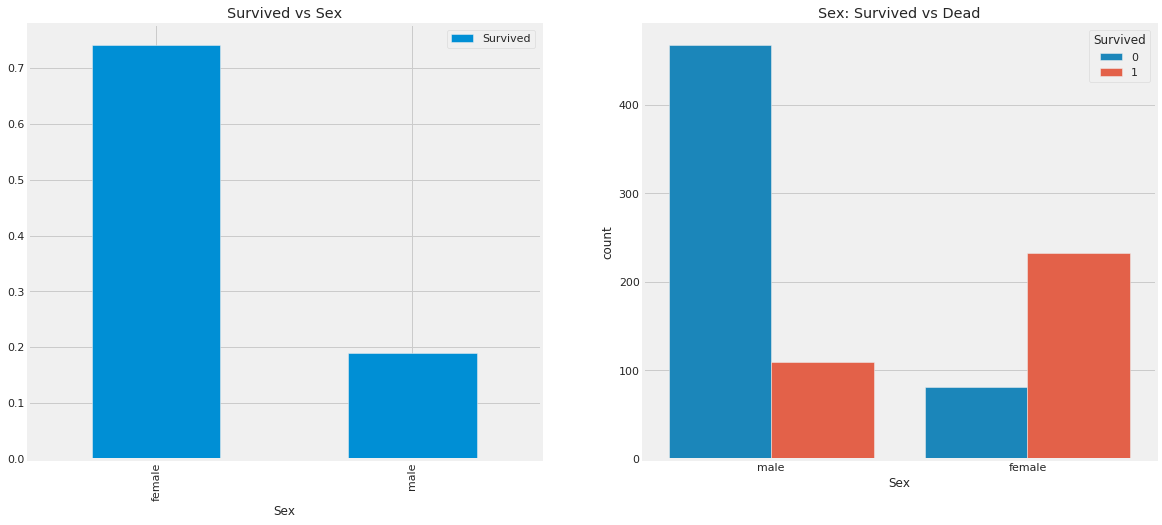

In [81]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

이것은 흥미로워 보인다. 배의 남성 수는 여성 수보다 훨씬 많습니다. 여전히 여성 수는 남성 수의 거의 두 배입니다. 선박의 여성의 생존율은 약 75 % 인 반면 남성의 생존율은 약 18-19 %입니다.

이것은 모델링에 매우 중요한 기능인 것 같습니다. 그러나 그것은 최고입니까? 다른 기능을 확인할 수 있습니다.

### Pclass

In [82]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


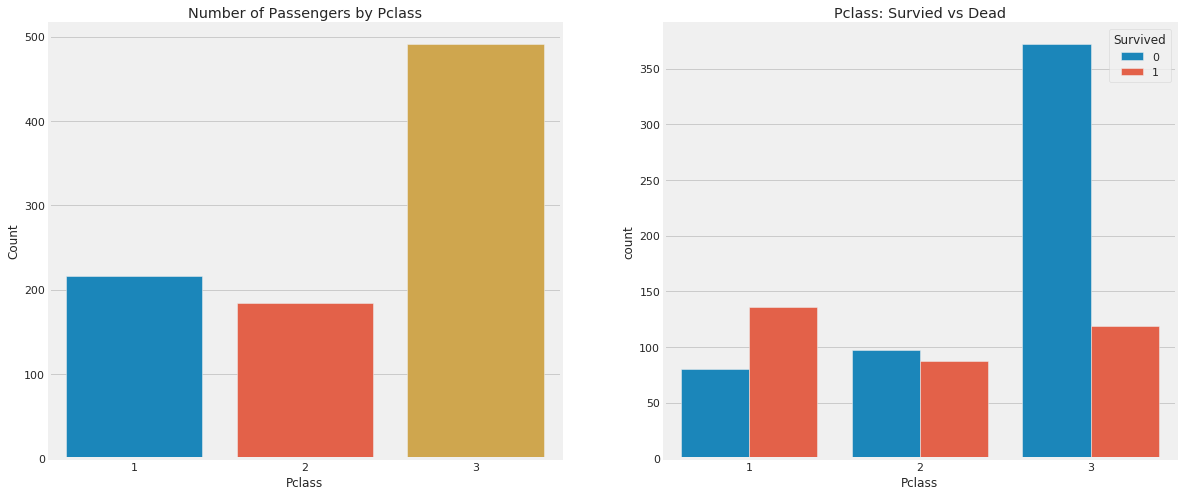

In [83]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.countplot(x='Pclass', data=data, ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survied vs Dead')
plt.show()

사람들은 돈이 모든 것을 살 수 없다고 말합니다. 그러나 Pclass 1의 Passenegers of Pclass 1은 구조하는 동안 매우 높은 우선 순위가 부여되었음을 분명히 알 수 있습니다. Pclass 3의 승객 수는 훨씬 많았지 만 여전히 25 % 정도의 생존률은 매우 낮습니다.

Pclass 1의 경우 생존율은 약 63 %이고 Pclass2의 경우 약 48 %입니다. 돈과 지위가 중요합니다. 그런 물질주의 세계.

조금 더 뛰어 들고 다른 흥미로운 관찰을 확인하십시오. Sex와 Pclass Together로 생존율을 확인할 수 있습니다.

In [84]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

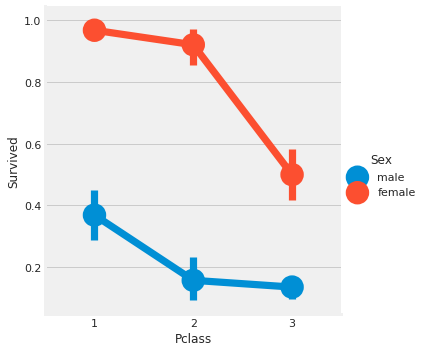

In [85]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

이 경우 FactorPlot을 사용합니다. 범주 형 값을 쉽게 분리 할 수 있기 때문입니다.

CrossTab과 FactorPlot을 살펴보면 Pclass1에서 94 명의 여성 중 3 명만이 사망 한 것처럼 Pclass1에서 여성의 생존율은 약 95-96 %임을 쉽게 알 수 있습니다.

Pclass와 상관없이 구출하는 동안 여성에게 최우선 순위가 부여 된 것은 분명합니다. Pclass1의 남성조차도 생존율이 매우 낮습니다.

Pclass도 중요한 기능인 것 같습니다. 다른 기능을 분석 할 수 있습니다.

### Age

In [86]:
oldest = data['Age'].max()
youngest = data['Age'].min()
average = data['Age'].mean()

print(f'Oldest Passenger was of {oldest} years')
print(f'Youngest Passenger was of {youngest} years')
print(f'Average age on the ship : {average} years')

Oldest Passenger was of 80.0 years
Youngest Passenger was of 0.42 years
Average age on the ship : 29.69911764705882 years


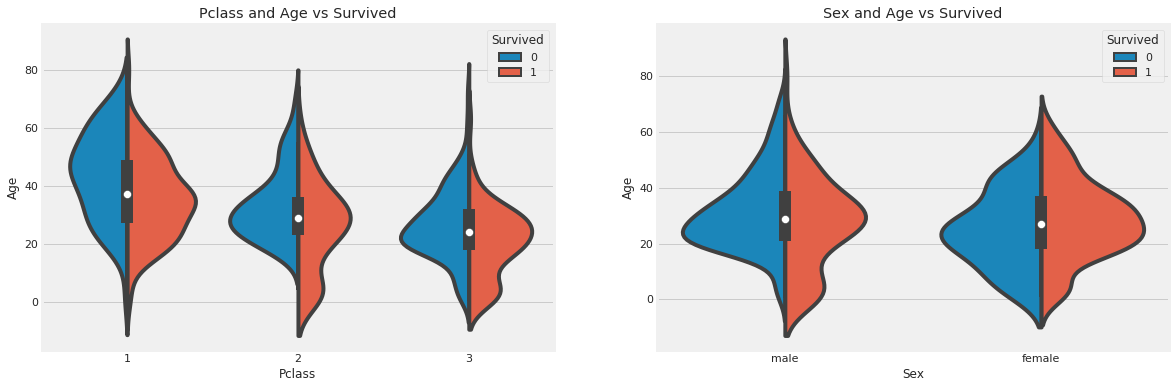

In [87]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')

sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
plt.show()

#### Observations:

- Pclass에 따라 어린이 수가 증가하고 10 세 미만의 어린이 (즉, 어린이)의 생존율은 Pclass에 상관없이 양호 해 보입니다.

- Pclass1에서 20-50 세의 Passeneger의 생존 가능성은 높고 여성에게는 더 좋습니다.

- 남성의 경우 생존 확률은 나이가 증가함에 따라 감소합니다.

앞에서 살펴본 것처럼 Age 기능에는 177 개의 null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 집합의 평균 수명을 지정할 수 있습니다.

그러나 문제는 나이가 많은 많은 사람들이 있다는 것입니다. 우리는 평균 연령이 29 세인 4 세 아이를 배정 할 수 없습니다. 승객이 어떤 연령대에 있는지 알 수있는 방법이 있습니까?

빙고 !!!! 이름 기능을 확인할 수 있습니다. 이 기능을 살펴보면 이름에 Mr 또는 Mrs와 같은 인사말이 있음을 알 수 있으므로 Mr 및 Mrs의 평균 값을 각 그룹에 할당 할 수 있습니다.


In [88]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [89]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [90]:
data['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer',
     'Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr',
     'Mr','Mr','Mr','Mr'],inplace=True)

In [91]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        33.022727
Mrs       35.981818
Name: Age, dtype: float64

In [92]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs
Sex,,,,
female,0,186,1,127
male,40,0,537,0


#### Filling NaN Ages

In [93]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22

In [94]:
data.Age.isnull().any()

False

Text(0.5, 1.0, 'Age Distribution Survived')

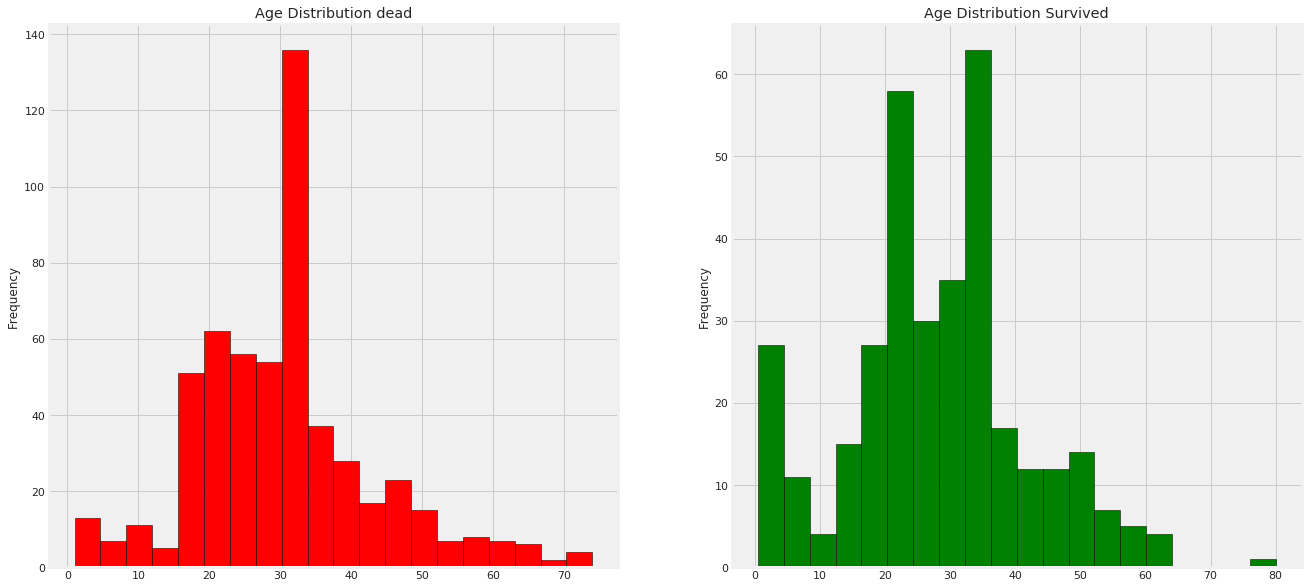

In [97]:
f, ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Age Distribution dead')
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Age Distribution Survived')

#### Observations:

- 유아 (5 세 미만)는 다량으로 생존했다 (여성과 아동 우선 정책).

- 최연장자는 구출되었다 (80 년).

- 30-40 세의 연령 그룹이 최대 사망자 그룹이었다.

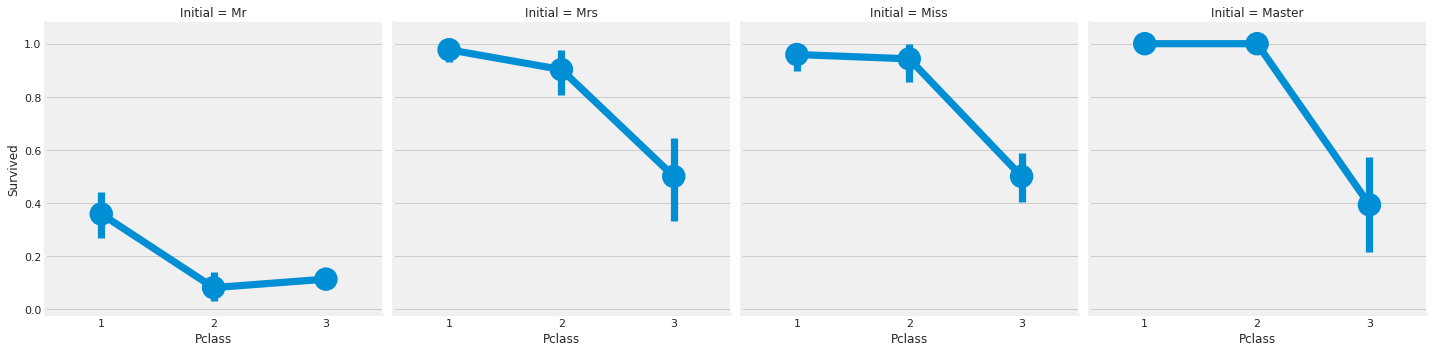

In [98]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

여성과 아이 우선 구조 정책은 적용되었으나 특히 1,2 등급에서 우선되었음을 알수 있다.

### Embarked

In [100]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], 
            margins=True).style.background_gradient(cmap='summer_r')

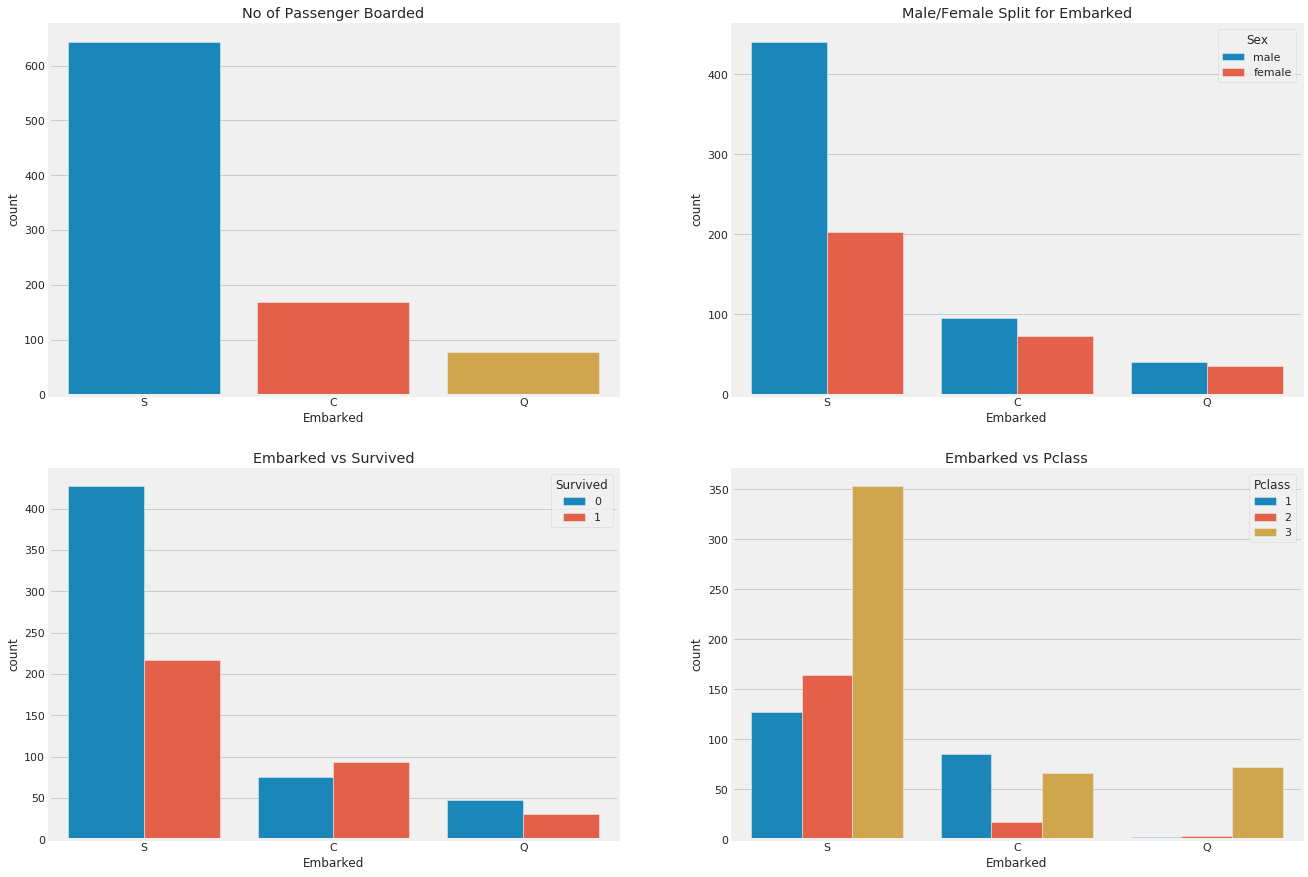

In [103]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No of Passenger Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male/Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.show()

#### Observations:

- S에서 탑승 한  대다수는 Pclass3에서 입니다.

- C의 승객은 상대적으로 더 많은 승객이 살아납는데 1,2 클래스 승객이 많은게 요인으로 보입니다.

- Embark S는 Pclass3의 많은 승객이 약 81 %가 생존하지 못했기 때문에 많은 부자들이 타고도 생존률이 높지 않다. 

- 포트 Q의 승객은 거의95 %가 Pclass3이었다.

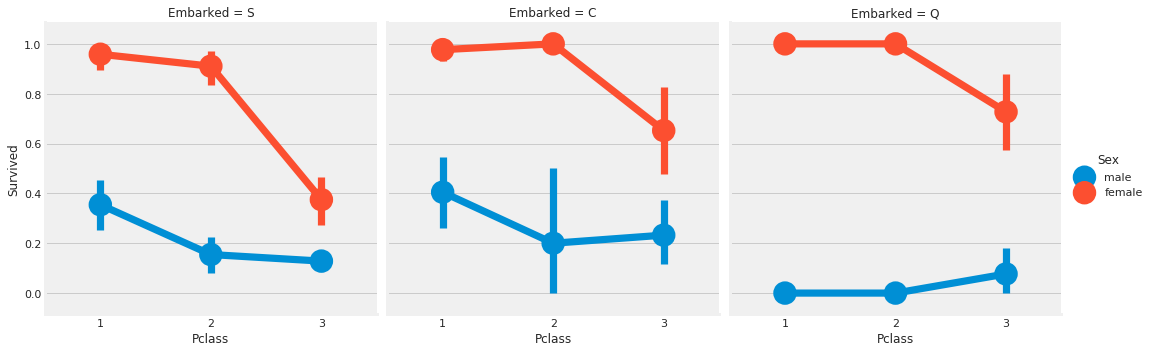

In [105]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked', data=data)
plt.show()

Observations:

- Pclass1과 Pclass2의 여성의 생존 확률은 거의 1입니다.

- Port S는 Pclass3 승객에게 매우 불행한 것으로 보입니다. 남성과 여성의 생존율이 매우 낮기 때문입니다. 

- 포트 Q의 남성은 모두 클래스3이고 이에 따라 거의 생존하지 않은것으로 보입니다.

### Filling Embarked Nan

In [108]:
data['Embarked'].fillna('S', inplace=True)

In [109]:
data.Embarked.isnull().any()

False

### SibSp

In [111]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


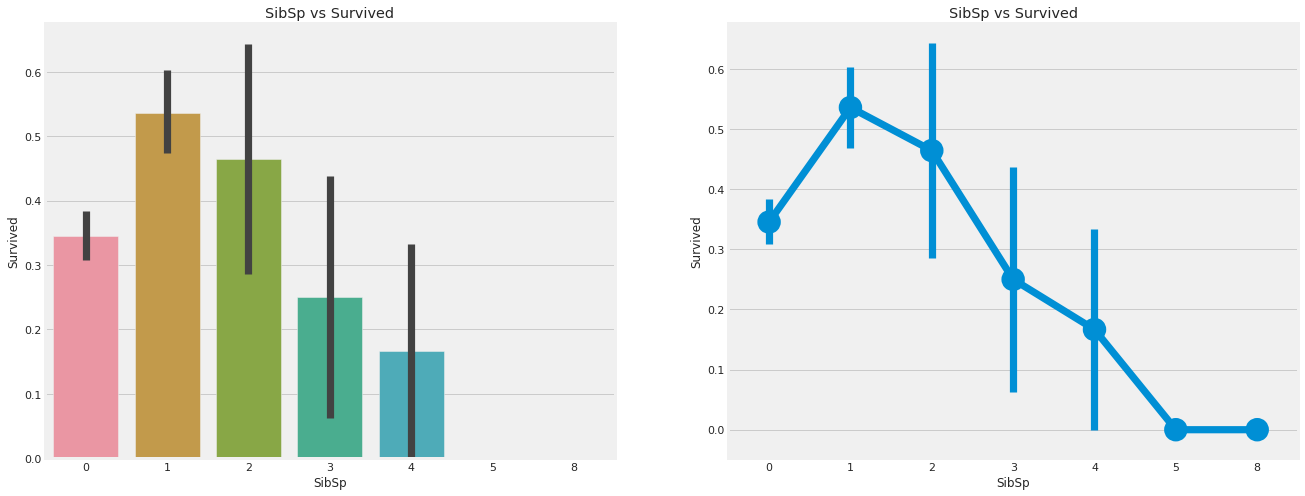

In [114]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [116]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


<b>Observations:</b>
    
barplot과 factorplot은 승객이 형제 자매없이 혼자 탑승하는 경우 생존율이 34.5 %임을 나타냅니다. 형제 수가 증가하면 그래프가 크게 줄어 듭니다. 이것은 말이됩니다. 즉, 선내에 남아있는 가족이 있으면 자신보다 아이들부터 먼저구하려고 할것입니다. 
놀랍게도 5-8 인 가족의 생존율은 0 %입니다.

그 이유는 Pclass입니다. 크로스 탭은 SibSp > 3 인 Person이 모두 Pclass3에 있음을 보여줍니다. Pclass3 (> 3)의 모든 대가족이 죽었다는 것은 알수 있습니다.

### Parch

In [119]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='Oranges')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


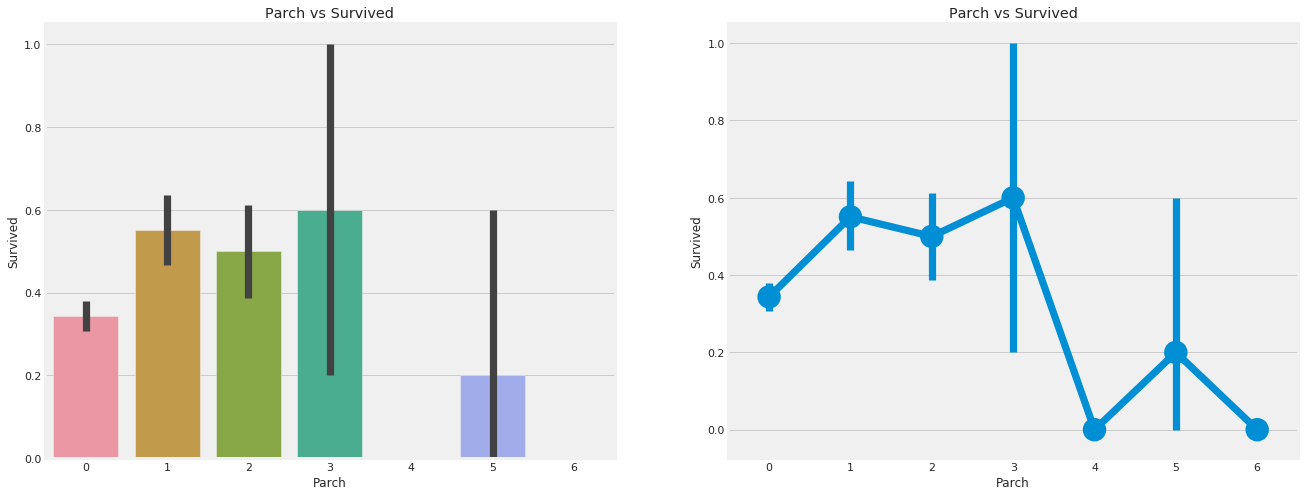

In [120]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot('Parch','Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

<b>Observations</b>

여기에서도 결과는 매우 비슷합니다. 부모와 함께 탑승 한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 올라 갈수록 줄어 듭니다.

생존 가능성은 배에 1-3 명의 부모가있는 누군가에게 좋습니다. 혼자 사는 것이 또한 치명적인 것으로 판명되고 누군가가 배에> 4 명의 부모가 있으면 생존 가능성이 줄어 듭니다.

### Fare

In [122]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


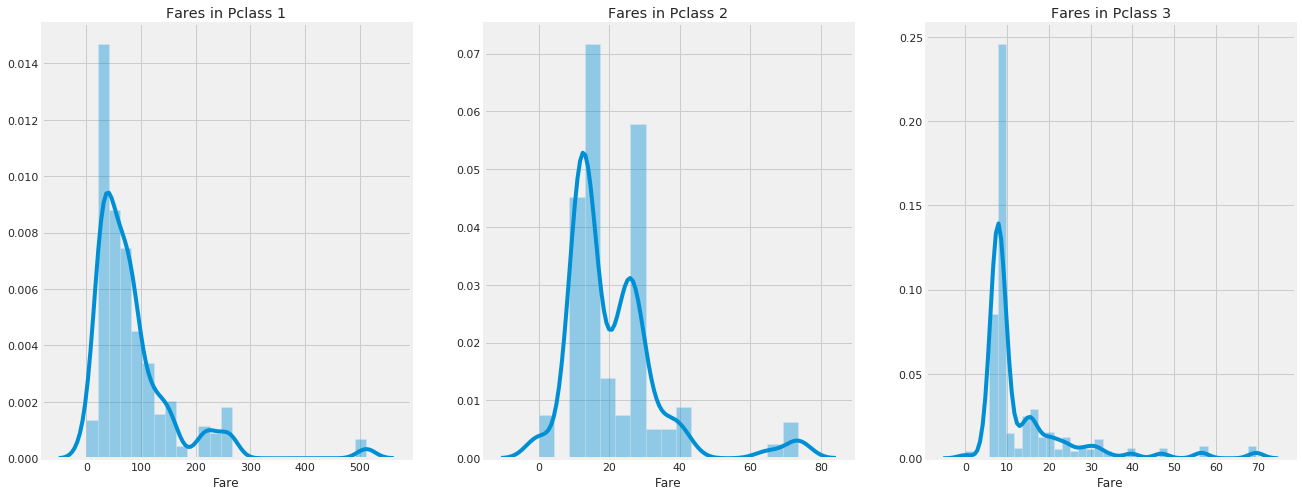

In [125]:
f, ax = plt.subplots(1,3, figsize=(20,8))
sns.distplot(data[data.Pclass == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data.Pclass == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data.Pclass == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1의 승객 요금에는 큰 분포가있는 것으로 보이며이 분포는 표준이 감소함에 따라 계속 감소합니다. 이것은 또한 연속적이므로 bin을 사용하여 불연속 값으로 변환 할 수 있습니다.

### Observations in a Nutshell for all features:

- Sex : 여성의 생존 가능성은 남성에 비해 높습니다.

- Pclass : 1 등석 승객이 생존 가능성을 높이는 가시적 인 추세가 있습니다. Pclass3의 생존율은 매우 낮습니다. 여성의 경우 Pclass1의 생존 가능성은 거의 1이며 Pclass2의 생존 가능성도 높습니다. 돈이 이긴다 !!!.

- Age : 5-10 세 미만의 어린이는 생존 가능성이 높습니다. 15 ~ 35 세 그룹 승객은 많이 사망했습니다.

- Embarked : 이것은 매우 흥미로운 기능입니다. C에서 생존 할 가능성은 Pclass1 승객의 대다수가 S에서 일어 났을 때보 다 더 나은 것으로 보입니다. Q의 승객은 모두 Pclass3에서 왔습니다.

- Parch + SibSp : 1-2 명의 형제 자매, 배우자 또는 1-3 명의 부모님이 혼자 있거나 대가족과 함께 여행하는 것보다 확률이 더 높습니다.

### Correlation Between The Features

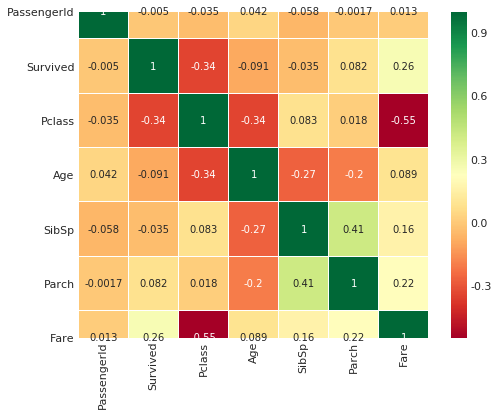

In [141]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(7,6)
plt.show()

가장 먼저 알아 두어야 할 것은 알파벳이나 문자열을 서로 연관시킬 수 없다는 것이 명백하기 때문에 숫자 기능 만 비교한다는 것입니다. 줄거리를 이해하기 전에 정확히 상관 관계가 무엇인지 살펴 보겠습니다.

긍정적 상관 관계 : 기능 A가 증가하면 기능 B가 증가하면 양의 상관 관계가 있습니다. 값 1은 완벽한 양의 상관 관계를 의미합니다.

음의 상관 관계 : 피처 A의 증가가 피처 B의 감소로 이어지면, 그것들은 음의 상관 관계가 있습니다. 값 -1은 완벽한 음의 상관 관계를 의미합니다.

이제 두 기능이 서로 완벽하게 상호 연관되어 있다고 말하면 한 기능이 증가하면 다른 기능도 증가합니다. 이는 두 기능 모두 매우 유사한 정보를 포함하고 있으며 정보의 차이가 거의 없거나 전혀 없음을 의미합니다. 둘 다 거의 동일한 정보를 포함하므로이를 다중 선형성이라고합니다.

따라서 둘 중 하나가 중복되므로 두 가지를 모두 사용해야한다고 생각하십니까? 모델을 만들거나 훈련하는 동안 훈련 시간과 많은 이점을 줄이면서 중복 기능을 제거해야합니다.

위의 히트 맵에서 기능이 서로 관련이 없음을 알 수 있습니다. 가장 높은 상관 관계는 SibSp와 Parch 즉 0.41입니다. 모든 기능을 계속 수행 할 수 있습니다.

## Part2: Feature Engineering and Data Cleaning

피쳐 엔지니어링이란 무엇일까?

기능이있는 데이터 세트가 제공 될 때마다 모든 기능이 중요 할 필요는 없습니다. 제거해야 할 중복 기능이 많이있을 수 있습니다. 또한 다른 기능에서 정보를 관찰하거나 추출하여 새로운 기능을 얻거나 추가 할 수 있습니다.

예를 들어 이름 기능을 사용하여 초기 기능을 얻는 것이 있습니다. 새로운 기능을 사용할 수 있는지 확인하고 몇 가지 기능을 제거하십시오. 또한 기존 관련 기능을 예측 모델링에 적합한 형식으로 변환합니다.

### Age_band

Age Feature의 문제점

앞서 언급 한 것처럼 Age는 지속적인 기능이므로 Machine Learning Models의 연속 변수에 문제가 있습니다.

예 : 성별을 기준으로 스포츠 인을 그룹화하거나 정리할 경우 남성과 여성별로 쉽게 분리 할 수 있습니다.

이제 나이별로 그룹화한다고하면 어떻게 하시겠습니까? 30 명의 사람이있는 경우 30 세의 나이 값이있을 수 있습니다. 이제 문제가 있습니다.

비닝 또는 정규화를 통해 이러한 연속 값을 범주 형 값으로 변환해야합니다. 비닝을 사용합니다. 즉, 연령 범위를 단일 빈으로 그룹화하거나 단일 값을 할당합니다.

승객의 최대 연령은 80 세입니다. 따라서 0-80에서 5 개의 빈으로 범위를 나눕니다. 따라서 80 / 5 = 16입니다. 16의 쓰레기통.

In [146]:
data['Age_band']=0
data.loc[data.Age <= 16,'Age_band'] = 0
data.loc[(data.Age > 16) & (data.Age <= 32),'Age_band'] = 1
data.loc[(data.Age > 32) & (data.Age <= 48),'Age_band'] = 2
data.loc[(data.Age > 48) & (data.Age <= 64),'Age_band'] = 3
data.loc[data.Age > 64,'Age_band'] = 4
data.loc[:7,['Age','Age_band']]

,Age,Age_band
0,22.0,1
1,38.0,2
2,26.0,1
3,35.0,2
4,35.0,2
5,33.0,2
6,54.0,3
7,2.0,0


In [149]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='Oranges')

,Age_band
1,382
2,325
0,104
3,69
4,11


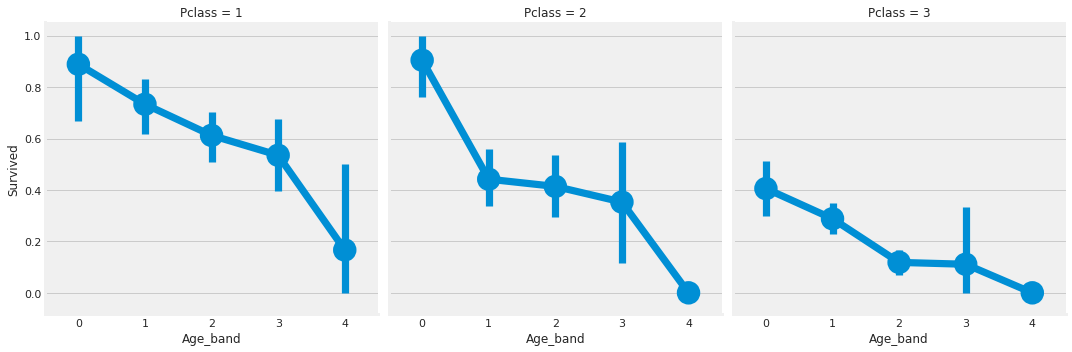

In [150]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

### Family_Size and Alone

이제 "Family_size"및 "Alone"이라는 새 기능을 생성하고 분석 할 수 있습니다. 이 기능은 Parch와 SibSp의 요약입니다. 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합 된 데이터를 제공합니다. 혼자 승객인지 여부를 나타냅니다.

In [151]:
data['Family_Size'] = 0
data['Family_Size'] = data['SibSp'] + data['Parch']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

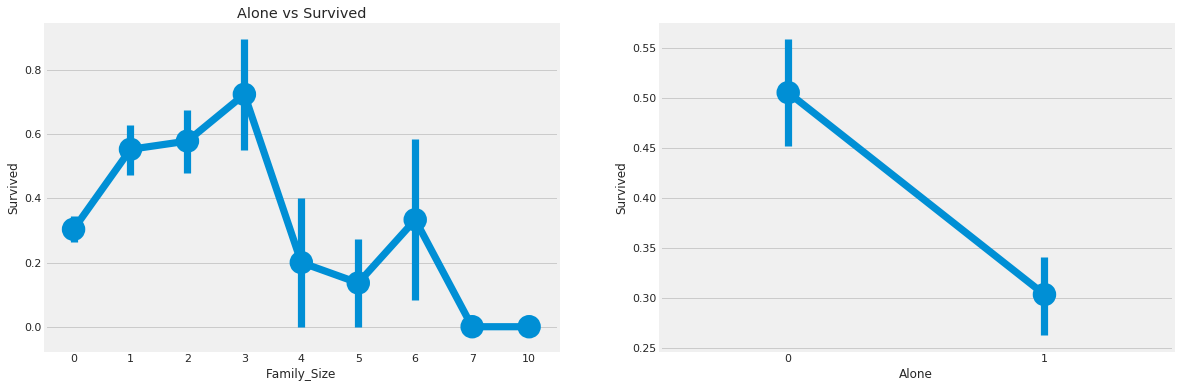

In [154]:
f, ax = plt.subplots(1,2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[0].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size = 0은 단독 여행자입니다. family_size = 0이면 생존 가능성이 매우 낮습니다. 가족 수 > 4 인 경우 기회도 줄어 듭니다. 이것은 또한 모델에 중요한 기능으로 보입니다. 이것을 자세히 살펴 보자.

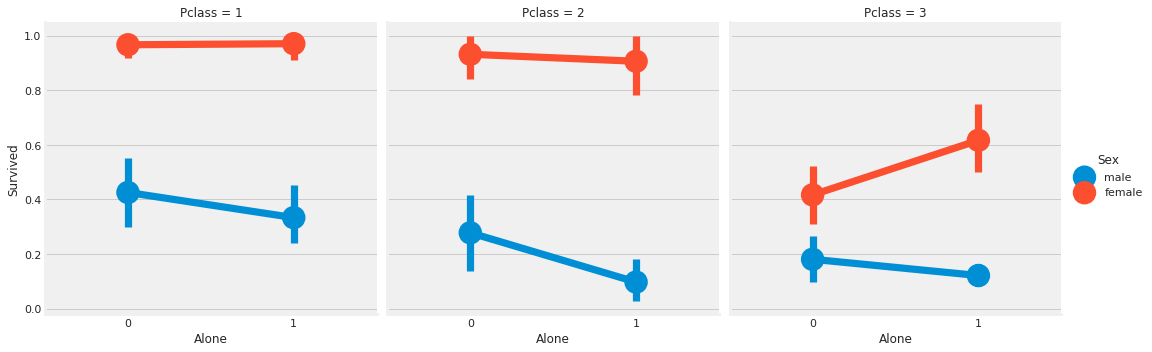

In [155]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

대부분의 조건에서 Alone=1인 경우 생존률이 떨어지나 클래스3의 여성일 경우에는 생존률이 크게 높아졌다.

### Fare_Range

운임은 지속적인 특징이므로이를 서수 값으로 변환해야합니다. 이를 위해 pandas.qcut을 사용합니다.

qcut은 우리가 통과 한 빈의 수에 따라 값을 나누거나 정렬합니다. 따라서 5 개의 구간을 전달하면 5 개의 구간 또는 값 범위에 동일한 간격으로 값이 정렬됩니다.

In [158]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='Oranges')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [160]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[ (data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[ (data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[data['Fare'] > 31, 'Fare_cat'] = 3

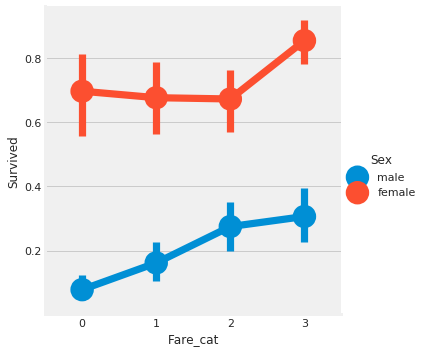

In [161]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

Fare_cat이 증가함에 따라 생존 확률이 증가합니다. 이 기능은 성별과 함께 모델링하는 동안 중요한 기능이 될 수 있습니다.

### Converting String Values into Numeric

문자열을 기계 학습 모델로 전달할 수 없으므로 성 (Lake) 성별, 시작 (Ebarked) 등의 기능을 숫자 값으로 변환해야합니다.

In [163]:
data['Sex'].replace(['male', 'female'],[0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Droping No needed Features

In [164]:
data.drop(['Age', 'Name', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], 
          axis=1, inplace=True)

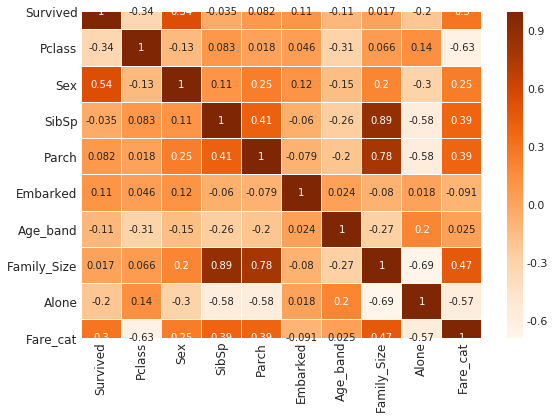

In [168]:
sns.heatmap(data.corr(), annot=True, cmap='Oranges', linewidths=0.1, annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Part3: Predictive Modeling

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [202]:
train, test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Survived'])
X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']

X_test = test.drop(['Survived'], axis=1)
y_test = test['Survived']

In [251]:
models = []
accuracy = []
recall = []
precision = []

In [252]:
def train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('Accuracy of',type(model).__name__, 'is', metrics.accuracy_score(pred, y_test))
    print('Precision of',type(model).__name__, 'is', metrics.precision_score(pred, y_test))
    print('Recall of',type(model).__name__, 'is', metrics.recall_score(pred, y_test))
    models.append(type(model).__name__)
    accuracy.append(metrics.accuracy_score(pred, y_test))
    recall.append(metrics.recall_score(pred, y_test))
    precision.append(metrics.precision_score(pred, y_test))

### Radial Support Vector Machines(rbf-SVM)

In [253]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
train_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy of SVC is 0.8208955223880597
Precision of SVC is 0.7184466019417476
Recall of SVC is 0.7956989247311828


### Linear Support Vector Machine

In [254]:
model = svm.SVC(kernel='linear', C=1, gamma=0.1)
train_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy of SVC is 0.8171641791044776
Precision of SVC is 0.7184466019417476
Recall of SVC is 0.7872340425531915


### Logistic Regression

In [255]:
model = LogisticRegression()
train_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy of LogisticRegression is 0.8246268656716418
Precision of LogisticRegression is 0.7572815533980582
Recall of LogisticRegression is 0.78


### Decision Tree

In [256]:
model=DecisionTreeClassifier()
train_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy of DecisionTreeClassifier is 0.7910447761194029
Precision of DecisionTreeClassifier is 0.6601941747572816
Recall of DecisionTreeClassifier is 0.7640449438202247


### K-Nearest Neighbours(KNN)

In [257]:
model=KNeighborsClassifier() 
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy of',type(model).__name__, 'is', metrics.accuracy_score(pred, y_test))
print('Precision of',type(model).__name__, 'is', metrics.precision_score(pred, y_test))
print('Recall of',type(model).__name__, 'is', metrics.recall_score(pred, y_test))

Accuracy of KNeighborsClassifier is 0.7985074626865671
Precision of KNeighborsClassifier is 0.6407766990291263
Recall of KNeighborsClassifier is 0.7951807228915663


In [263]:
candidate = range(1,11)
scores = []
for i in candidate:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(metrics.accuracy_score(pred,y_test))

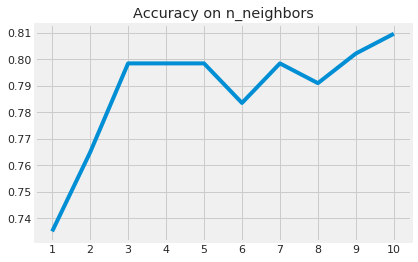

In [264]:
plt.plot(candidate, scores)
plt.title('Accuracy on n_neighbors')
plt.xticks(candidate)
plt.show()

In [265]:
model=KNeighborsClassifier(n_neighbors=10) 
train_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy of KNeighborsClassifier is 0.8097014925373134
Precision of KNeighborsClassifier is 0.6504854368932039
Recall of KNeighborsClassifier is 0.8170731707317073


### Gaussian Navie Bayes

In [266]:
model = GaussianNB()
train_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy of GaussianNB is 0.8134328358208955
Precision of GaussianNB is 0.7961165048543689
Recall of GaussianNB is 0.7387387387387387


### RandomForest 

In [267]:
model = RandomForestClassifier()
train_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy of RandomForestClassifier is 0.8059701492537313
Precision of RandomForestClassifier is 0.6796116504854369
Recall of RandomForestClassifier is 0.7865168539325843


### Compare all algorithms

In [270]:
algorithm_score = pd.DataFrame(
    {
        'model':models,
        'accuray':accuracy,
        'recall':recall,
        'precision':precision
    }
)

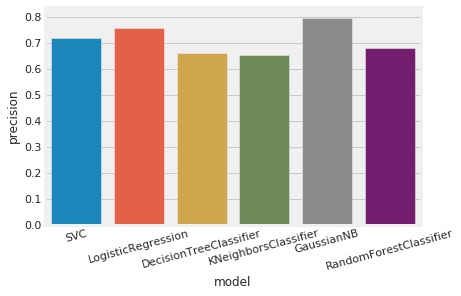

In [276]:
sns.barplot('model','precision',data=algorithm_score)
plt.xticks(rotation=15)
plt.show()

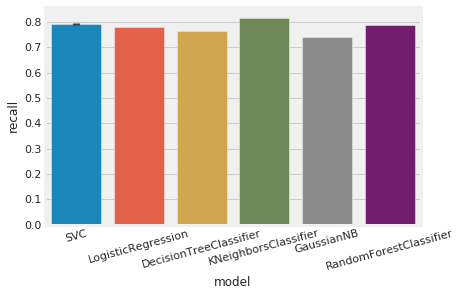

In [277]:
sns.barplot('model','recall',data=algorithm_score)
plt.xticks(rotation=15)
plt.show()